<a href="https://colab.research.google.com/github/OmarK920/NLP-Projects-/blob/main/financial_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-sentiment-analysis/data.csv


# **Importing & Reading Data**

In [ ]:
## Remove Warnings ##
import warnings
warnings.filterwarnings("ignore")

## DATA ##
import numpy as np
import pandas as pd
import re

## NLP ##
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Visualization ##
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## ML Modelling ##
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## NGrams ##
from nltk.util import ngrams
from collections import Counter

In [ ]:
df = pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv')

# **EDA**

In [ ]:
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
df.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [ ]:
df.shape

(5322, 3)

In [ ]:
print(df.describe())
print(df.info())


                                                 Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Managing Director 's comments : `` Net sales f...   neutral
freq                                                    2      3130
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None


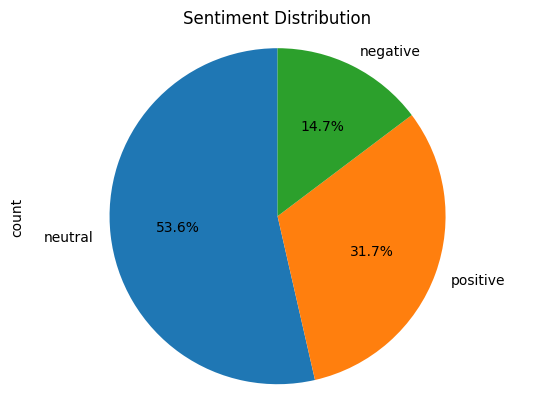

In [ ]:
sentiment_distribution.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


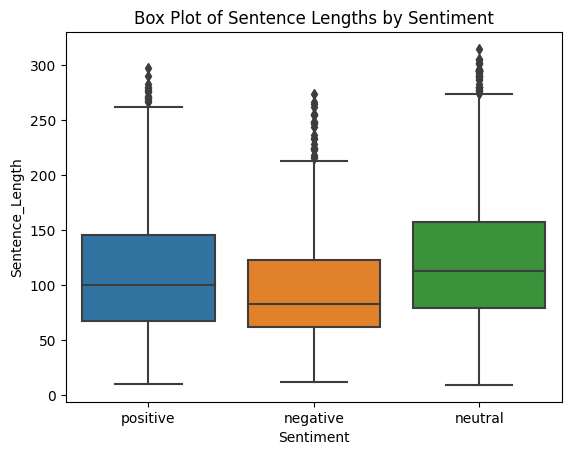

In [ ]:
import seaborn as sns

sns.boxplot(x='Sentiment', y='Sentence_Length', data=df)
plt.title('Box Plot of Sentence Lengths by Sentiment')
plt.show()


Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


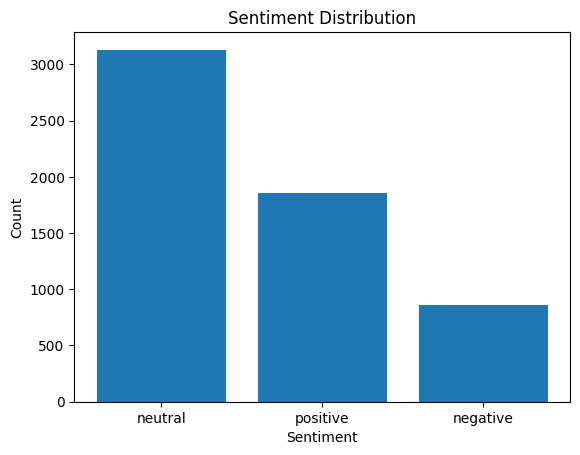

In [ ]:
sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)

# Plotting the sentiment distribution
import matplotlib.pyplot as plt

plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


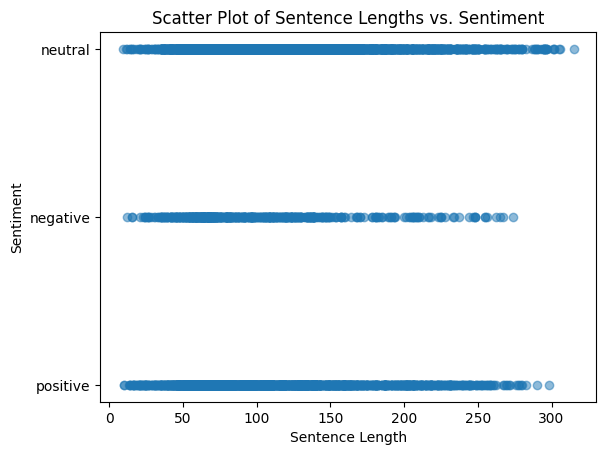

In [ ]:
plt.scatter(df['Sentence_Length'], df['Sentiment'], alpha=0.5)
plt.xlabel('Sentence Length')
plt.ylabel('Sentiment')
plt.title('Scatter Plot of Sentence Lengths vs. Sentiment')
plt.show()


count    5842.000000
mean      117.022253
std        56.420425
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: Sentence_Length, dtype: float64


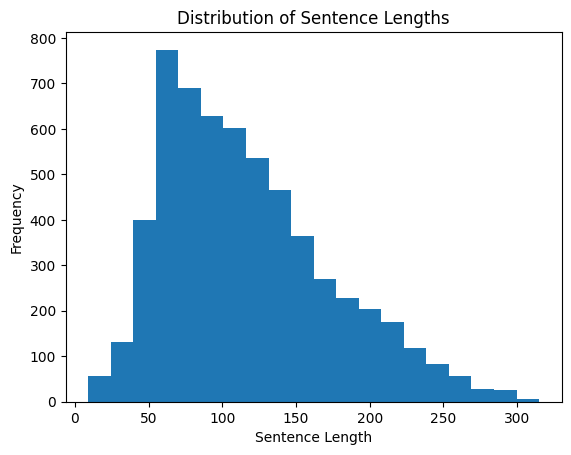

In [ ]:
df['Sentence_Length'] = df['Sentence'].apply(len)

# Display statistics for sentence length
print(df['Sentence_Length'].describe())

# Plotting a histogram of sentence lengths
plt.hist(df['Sentence_Length'], bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()


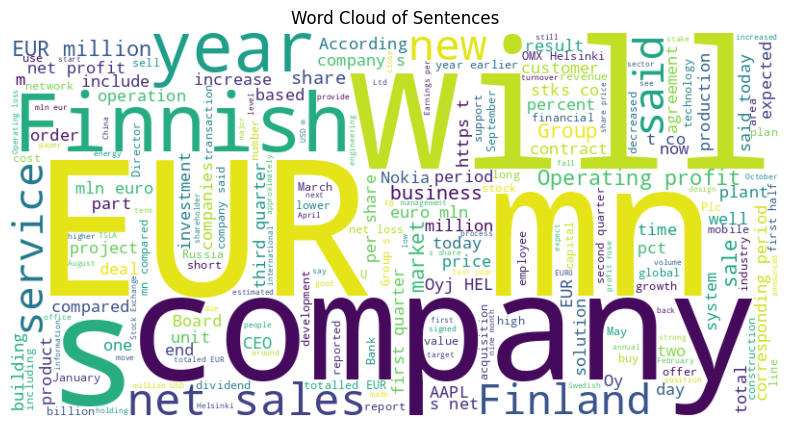

In [ ]:
from wordcloud import WordCloud

# Concatenate all sentences into a single string
text = ' '.join(df['Sentence'])

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sentences')
plt.show()


# **Data Preprocessing**

In [ ]:
print("Number of duplicates: " + str(df.duplicated().sum()))


Number of duplicates: 6


In [ ]:
# Remove duplicates based on specific columns (e.g., 'A' column)
df = df.drop_duplicates(subset=['Sentence'])




In [ ]:
print("Number of duplicates: " + str(df.duplicated().sum()))


Number of duplicates: 0


In [ ]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [ ]:
df.columns

Index(['Sentence', 'Sentiment', 'Sentence_Length'], dtype='object')

In [ ]:
import nltk

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

True

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['Sentence'] = df['Sentence'].str.lower()


In [ ]:
import string

df['Sentence'] = df['Sentence'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming df is your DataFrame and 'sentence' is the column you want to preprocess
df['processed_sentence'] = df['Sentence'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x).lower())
stop_words = set(stopwords.words('english'))
df['processed_sentence'] = df['processed_sentence'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Encode sentiment labels
label_encoder = LabelEncoder()
df['encoded_sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Combine encoded sentiment with the processed sentence
df['sentiment_sentence'] = df['encoded_sentiment'].astype(str) + ' ' + df['processed_sentence']

# Tokenize sentences into lists of words
tokenized_sentences = df['sentiment_sentence'].apply(lambda x: word_tokenize(x.lower()))

# Train Word2Vec model
embedding_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the vector representation of a sentence
def get_sentence_vector(sentence):
    words = [word for word in word_tokenize(sentence.lower()) if word not in stop_words]
    vectors = [embedding_model.wv[word] for word in words if word in embedding_model.wv]
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)
    else:
        return None

# Apply the function to the 'sentiment_sentence' column and create a new column for embeddings
df['word_embeddings'] = df['sentiment_sentence'].apply(get_sentence_vector)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,Sentence,Sentiment,Sentence_Length,processed_sentence,encoded_sentiment,sentiment_sentence,word_embeddings
0,geosolutions technology leverage benefon gps s...,positive,218,geosolutions technology leverage benefon gps s...,2,2 geosolutions technology leverage benefon gps...,"[-0.019059308, 0.1712682, 0.076446936, 0.02435..."
1,esi lows 150 250 bk real possibility,negative,55,esi lows bk real possibility,0,0 esi lows bk real possibility,"[-0.014966212, 0.13855353, 0.05823304, 0.02029..."
2,last quarter 2010 componenta net sales doubled...,positive,193,last quarter componenta net sales doubled eur ...,2,2 last quarter componenta net sales doubled eu...,"[0.024235673, 0.2764613, -0.07501848, 0.088028..."
3,according finnishrussian chamber commerce majo...,neutral,128,according finnishrussian chamber commerce majo...,1,1 according finnishrussian chamber commerce ma...,"[-0.026782835, 0.27955335, 0.10242221, 0.04440..."
4,swedish buyout firm sold remaining 224 percent...,neutral,135,swedish buyout firm sold remaining percent sta...,1,1 swedish buyout firm sold remaining percent s...,"[-0.021450687, 0.2501538, 0.095560424, 0.03735..."


In [ ]:
df.columns

Index(['Sentence', 'Sentiment', 'Sentence_Length', 'processed_sentence',
       'encoded_sentiment', 'sentiment_sentence', 'word_embeddings'],
      dtype='object')

In [ ]:
ready_df = df[['word_embeddings' , 'encoded_sentiment']]

In [ ]:
ready_df.head()

,word_embeddings,encoded_sentiment
0,"[-0.019059308, 0.1712682, 0.076446936, 0.02435...",2
1,"[-0.014966212, 0.13855353, 0.05823304, 0.02029...",0
2,"[0.024235673, 0.2764613, -0.07501848, 0.088028...",2
3,"[-0.026782835, 0.27955335, 0.10242221, 0.04440...",1
4,"[-0.021450687, 0.2501538, 0.095560424, 0.03735...",1


# **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['word_embeddings'], df['encoded_sentiment'], test_size=0.2, random_state=42)


In [ ]:
import numpy as np

# Convert the NumPy array to a list
X_train_list = X_train.tolist()

# Convert the text to lowercase
X_train_list_lower = [str(text).lower() for text in X_train_list]

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_list_lower)


In [ ]:
# Convert the NumPy array to a list
X_train_list = X_train.tolist()

# Convert the text to lowercase
X_train_list_lower = [str(text).lower() for text in X_train_list]

# Convert text data to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train_list_lower)


In [ ]:
# Convert the NumPy array to a list
X_test_list = X_test.tolist()

# Convert the text to lowercase
X_test_list_lower = [str(text).lower() for text in X_test_list]

# Convert text data to sequences
X_test_sequences = tokenizer.texts_to_sequences(X_test_list_lower)


In [ ]:
# Pad sequences to ensure equal length input for the model
max_len = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')



In [ ]:
# Label encode the sentiment column
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(80, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(3, activation='softmax'))  # Adjust the units to match the number of classes
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
lstm_model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
107/107 [==============================] - 74s 669ms/step - loss: 0.9555 - accuracy: 0.5492 - val_loss: 0.9466 - val_accuracy: 0.5305
Epoch 2/10
107/107 [==============================] - 71s 668ms/step - loss: 0.9321 - accuracy: 0.5512 - val_loss: 0.9479 - val_accuracy: 0.5305
Epoch 3/10
107/107 [==============================] - 70s 653ms/step - loss: 0.9312 - accuracy: 0.5536 - val_loss: 0.9445 - val_accuracy: 0.5246
Epoch 4/10
107/107 [==============================] - 70s 651ms/step - loss: 0.9198 - accuracy: 0.5674 - val_loss: 0.9597 - val_accuracy: 0.5246
Epoch 5/10
107/107 [==============================] - 105s 981ms/step - loss: 0.8816 - accuracy: 0.5883 - val_loss: 0.9536 - val_accuracy: 0.5235
Epoch 6/10
107/107 [==============================] - 70s 654ms/step - loss: 0.8481 - accuracy: 0.5977 - val_loss: 0.9554 - val_accuracy: 0.5317
Epoch 7/10
107/107 [==============================] - 69s 644ms/step - loss: 0.8373 - accuracy: 0.6018 - val_loss: 0.9621 - val_a

In [ ]:
# RNN Model (Simple RNN)
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(3, activation='softmax'))  # Adjust the units to match the number of classes
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
# Train the RNN model
rnn_model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
107/107 [==============================] - 77s 688ms/step - loss: 0.9526 - accuracy: 0.5518 - val_loss: 0.9482 - val_accuracy: 0.5305
Epoch 2/10
107/107 [==============================] - 75s 700ms/step - loss: 0.9382 - accuracy: 0.5510 - val_loss: 0.9462 - val_accuracy: 0.5305
Epoch 3/10
107/107 [==============================] - 73s 678ms/step - loss: 0.9333 - accuracy: 0.5551 - val_loss: 0.9512 - val_accuracy: 0.5305
Epoch 4/10
107/107 [==============================] - 111s 1s/step - loss: 0.9162 - accuracy: 0.5662 - val_loss: 0.9791 - val_accuracy: 0.5293
Epoch 5/10
107/107 [==============================] - 75s 703ms/step - loss: 0.8803 - accuracy: 0.5883 - val_loss: 0.9656 - val_accuracy: 0.5329
Epoch 6/10
107/107 [==============================] - 72s 672ms/step - loss: 0.8408 - accuracy: 0.5994 - val_loss: 0.9954 - val_accuracy: 0.4988
Epoch 7/10
107/107 [==============================] - 74s 688ms/step - loss: 0.8365 - accuracy: 0.6021 - val_loss: 1.1064 - val_accu

In [ ]:
# Evaluate models on the test set
lstm_predictions = lstm_model.predict(X_test_padded)
lstm_predictions_labels = label_encoder.inverse_transform(np.argmax(lstm_predictions, axis=1))
rnn_predictions = rnn_model.predict(X_test_padded)
rnn_predictions_labels = label_encoder.inverse_transform(np.argmax(rnn_predictions, axis=1))

# Evaluate and print accuracy and F1-score for LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_predictions_labels)
lstm_f1 = f1_score(y_test, lstm_predictions_labels, average='weighted')
print(f"LSTM Model Accuracy: {lstm_accuracy:.4f}")
print(f"LSTM Model F1-Score: {lstm_f1:.4f}")

# Evaluate and print accuracy and F1-score for RNN model
rnn_accuracy = accuracy_score(y_test, rnn_predictions_labels)
rnn_f1 = f1_score(y_test, rnn_predictions_labels, average='weighted')
print(f"RNN Model Accuracy: {rnn_accuracy:.4f}")
print(f"RNN Model F1-Score: {rnn_f1:.4f}")

34/34 [==============================] - 2s 48ms/step
LSTM Model Accuracy: 0.5202
LSTM Model F1-Score: 0.3601
RNN Model Accuracy: 0.5202
RNN Model F1-Score: 0.3601
